## Deforestation Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data/def_area_2004_2019.csv")

In [3]:
df.head()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [22]:
"""
AC - Deforestation area in Acre
AM - Amazon
AP - Amapa
MA - Maranhao
MT - Matao Grosso 
PA - Para
RO - Rondonia
RR - Roraima
TO - Tocantins
"""

'\nAC - Deforestation area in Acre\nAM - Amazon\nAP - Amapa\nMA - Maranhao\nMT - Matao Grosso \nPA - Para\nRO - Rondonia\nRR - Roraima\nTO - Tocantins\n'

In [5]:
import pandas_montecarlo

In [6]:
df.columns

Index(['Ano/Estados', 'AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO',
       'AMZ LEGAL'],
      dtype='object')

In [7]:
# https://github.com/ranaroussi/pandas-montecarlo
mc = df['AC'].montecarlo(sims=10, bust=-0.1, goal=1)

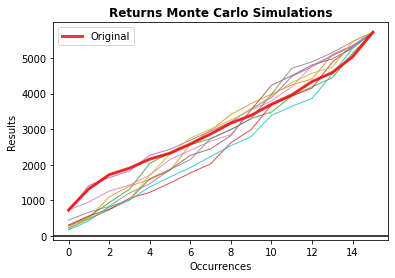

In [8]:
mc.plot(title="Returns Monte Carlo Simulations")  # optional: , figsize=(x, y)

## Map Plotting

In [18]:
#!pip3 install osmnx
#https://geoffboeing.com/2016/11/osmnx-python-street-networks/

In [13]:
import osmnx as ox

In [11]:
place = ['Modena, Italy']

In [28]:
#G = ox.graph_from_place(place) #retain_all=True, simplify = True, network_type='all')

In [31]:
#places = ox.geocode_to_gdf(['Amazon', 'Amapa', 'Maranhao', 'Matao Grosso', 'Para', 'Rondonia', 'Roraima', 'Tocantins'])

In [32]:
places = ox.geocode_to_gdf(['Acre', 'Alagoas', 'Amazonas', 'Amapá','Bahia', 'Ceará','Distrito Federal','Espírito Santo',
'Goiás','Maranhão','Minas Gerais','Mato Grosso do Sul','Mato Grosso','Pará','Paraíba','Pernambuco',
'Piauí','Paraná','Rio de Janeiro','Rio Grande do Norte','Rondônia','Roraima','Rio Grande do Sul',
                            'Santa Catarina','Sergipe','São Paulo','Tocantins'])

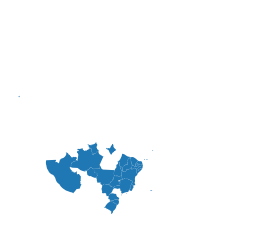

In [33]:
places = ox.project_gdf(places)
ax = places.plot()
_ = ax.axis('off')

## Read Metostat Data

In [2]:
#!pip3 install meteostat

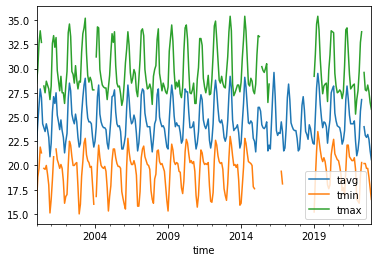

In [12]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Monthly, Stations

Bangalore = [12.9716, 77.5946]
stations = Stations()
stations = stations.nearby(Bangalore[0], Bangalore[1])
station = stations.fetch(1)

start = datetime(2000,1,1)
end = datetime(2022,12,31)



# Get daily data
data = Monthly(station, start, end)
data = data.normalize()
data = data.fetch()

data.plot(y=['tavg','tmin','tmax'])
plt.show()


In [16]:
data.head()

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
2000-01-01,22.3,16.1,28.5,0.0,NaN,NaN,15060.0
2000-02-01,24.4,18.8,30.0,58.0,NaN,NaN,10440.0
2000-03-01,26.1,19.7,32.6,0.0,NaN,NaN,15780.0
2000-04-01,27.9,21.9,33.9,76.0,NaN,NaN,13380.0
2000-05-01,27.0,21.3,32.7,57.0,NaN,NaN,15060.0


In [ ]:
"""
Temperature (avg, min, max)
prcp - daily precipitation
wspd - wind speed
pres - sea level air pressure in hPa
tsun - total sunshine duration
"""